In [148]:
import random

import copy
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import functions
from node2vec import Node2Vec

# data process
output_path = "C:\\Users\\HanLi\\Desktop\\Arch_Research\\Ecadia\\GNN\\pre_processed_data"
room_type_dict = {'LivingRoom':0, 'Bedroom':1, 'Kitchen':2, 'Dining':3, 'Bath':4, 'Storage':5, 'Entry':6, 'Garage':7, 'Other':8, 'Outdoor':9}
room_type = ['LivingRoom', 'Bedroom', 'Kitchen', 'Dining', 'Bath', 'Storage', 'Entry', 'Garage', 'Other', 'Outdoor']
Gs = []
for i in range (0,200):
    G = nx.read_gml(output_path+"\\data_1\\Gs_1_{}.gml".format(i))
    Gs.append(G)

In [149]:

for node in G.nodes:
    re_label = node.rstrip('0123456789').replace('_','')
    G.nodes[node]['class'] = re_label

if nx.number_connected_components(G) > 1:
    G = G.subgraph(max(nx.connected_components(G),key = len))


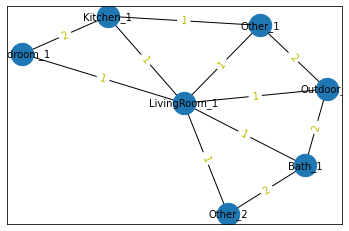

In [150]:
functions.visualize(G)

In [68]:
node2vec = Node2Vec(G,dimensions=16,walk_length=8,num_walks=100,p=0.25,q=0.4)
walk_list =[]
for walk in node2vec.walks:
    list = []
    for node in walk:
        list.append(node.rstrip('0123456789').replace('_',''))
    walk_list.append(list)
node2vec.walks = walk_list
model = node2vec.fit(window=8, min_count=1)

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 335.44it/s]


In [151]:
walk_list = []
for G in Gs:
    node2vec = Node2Vec(G,dimensions=16,walk_length=8,num_walks=100,p=0.25,q=0.4)

    for walk in node2vec.walks:
        list = []
        for node in walk:
            list.append(node.rstrip('0123456789').replace('_',''))
        walk_list.append(list)
node2vec = Node2Vec(G,dimensions=16,walk_length=8,num_walks=100,p=0.25,q=0.4)
node2vec.walks = walk_list
model = node2vec.fit(window=8, min_count=1)

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 249.30it/s]
Computing transition probabilities: 0it [00:00, ?it/s]
Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 234.00it/s]


In [153]:
node_weight={}

for room in room_type:
    try:
        node_weight[room] = model.wv[room]
    except KeyError as e:
        print(e)
print(node_weight)


{'LivingRoom': array([ 0.13220657,  0.14977673, -0.02396586,  1.0976588 , -0.64026   ,
        0.1627671 ,  0.4342142 , -0.1743136 , -0.3496114 ,  0.03309821,
        0.06395051, -0.37053376, -0.21993086,  0.15287036,  0.644795  ,
        0.07992168], dtype=float32), 'Bedroom': array([ 0.67798525,  0.13399132, -0.31474978,  0.6197679 , -0.37834868,
       -0.37790418, -0.01643126, -0.00859335, -0.48397073, -0.06252265,
       -0.29719418, -0.15231593,  0.37388816, -0.23366657,  0.2100687 ,
       -0.48471996], dtype=float32), 'Kitchen': array([-0.20431449, -0.13243093,  0.33290148,  0.9654803 , -0.723053  ,
       -0.4779301 , -0.07390789, -0.01603875, -0.32852617, -0.27950463,
       -0.10406268, -0.11245022,  0.06097937,  0.55519134, -0.10486899,
       -0.1172569 ], dtype=float32), 'Dining': array([-0.03396471,  0.01362621,  0.7002253 ,  1.4299141 , -0.7967055 ,
       -0.64258564, -0.48574448,  0.3242181 , -0.32504907,  0.2314213 ,
        0.71259725, -0.98936975, -0.21485858,  0.1

In [154]:
Gs_1 = []
for i in range (3493):
    G = nx.read_gml(output_path+"\\data_1\\Gs_1_{}.gml".format(i))
    Gs_1.append(G)
for i in range(len(Gs_1)):
    if nx.number_connected_components(Gs_1[i]) > 1:
        Gs_1[i] = Gs_1[i].subgraph(max(nx.connected_components(Gs_1[i]),key = len))

edge_list =[]

for graph in Gs_1:
    for pair_edges in graph.edges():
        list = []
        for edge in pair_edges:
            edge = edge.rstrip('0123456789').replace('_','')
            list.append(edge)
        edge_list.append(list)
print(len(edge_list))

33325


In [155]:
no_edge_list = []
for graph in Gs_1:
    for no_edges in nx.non_edges(graph):
        list = []
        for edge in no_edges:
            edge = edge.rstrip('0123456789').replace('_','')
            list.append(edge)
        no_edge_list.append(list)
print(len(no_edge_list))

137937


In [156]:
array_1 = np.random.randint(0,len(edge_list),size=20000)
sel_edge_list=[]
for number in array_1:
    sel_edge_list.append(edge_list[number])

array_2 = np.random.randint(0,len(no_edge_list),size=30000)
sel_no_edge_list=[]
for number in array_2:
    sel_no_edge_list.append(no_edge_list[number])

In [157]:
from sklearn.linear_model import LogisticRegression
array_sel_edge = []
for edge in sel_edge_list:
    feature = np.concatenate((np.array(node_weight[edge[0]]),np.array(node_weight[edge[1]])))
    array_sel_edge.append(feature)

array_sel_no_edge = []
for edge in sel_no_edge_list:
    feature = np.concatenate((np.array(node_weight[edge[0]]),np.array(node_weight[edge[1]])))
    array_sel_no_edge.append(feature)

X = np.array(np.concatenate((np.array(array_sel_edge),np.array(array_sel_no_edge))))
Y = np.array([np.concatenate((np.ones(len(array_sel_edge)),np.zeros(len(array_sel_no_edge))))])
Y = np.transpose(Y)

print(X)


[[ 0.3079786  -0.32096395  0.01762252 ...  0.55519134 -0.10486899
  -0.1172569 ]
 [ 0.3079786  -0.32096395  0.01762252 ... -0.3403562  -0.20915206
  -0.16026193]
 [ 0.13220657  0.14977673 -0.02396586 ... -0.23366657  0.2100687
  -0.48471996]
 ...
 [ 0.05135754 -0.4512765  -0.2883614  ...  0.43584856 -0.2678413
   0.24019538]
 [ 0.32418257 -0.24385616 -0.522838   ...  0.52273417 -0.24225043
   0.62311965]
 [ 0.3079786  -0.32096395  0.01762252 ... -0.23366657  0.2100687
  -0.48471996]]


In [175]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义神经网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.sigmoid(x)

# 创建一些示例数据
X = torch.tensor(X,dtype=torch.float32)
y = torch.tensor(Y,dtype=torch.float32)
# 创建神经网络模型和优化器
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1)
criterion = nn.BCELoss()

x = []
y_loss = []
# 训练神经网络
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 5== 0:
        x.append(epoch)
        y_loss.append(loss.item())
        print('Epoch %d, loss %.4f' % (epoch, loss.item()))

# 进行预测

C:\Anaconda\envs\graph_Network\lib\site-packages\ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 0, loss 0.6940
Epoch 5, loss 0.6880
Epoch 10, loss 0.6835
Epoch 15, loss 0.6802
Epoch 20, loss 0.6777
Epoch 25, loss 0.6758
Epoch 30, loss 0.6743
Epoch 35, loss 0.6731
Epoch 40, loss 0.6721
Epoch 45, loss 0.6713
Epoch 50, loss 0.6705
Epoch 55, loss 0.6698
Epoch 60, loss 0.6691
Epoch 65, loss 0.6685
Epoch 70, loss 0.6679
Epoch 75, loss 0.6672
Epoch 80, loss 0.6665
Epoch 85, loss 0.6659
Epoch 90, loss 0.6651
Epoch 95, loss 0.6644
Epoch 100, loss 0.6636
Epoch 105, loss 0.6627
Epoch 110, loss 0.6618
Epoch 115, loss 0.6609
Epoch 120, loss 0.6599
Epoch 125, loss 0.6588
Epoch 130, loss 0.6577
Epoch 135, loss 0.6564
Epoch 140, loss 0.6551
Epoch 145, loss 0.6537
Epoch 150, loss 0.6521
Epoch 155, loss 0.6504
Epoch 160, loss 0.6485
Epoch 165, loss 0.6466
Epoch 170, loss 0.6445
Epoch 175, loss 0.6423
Epoch 180, loss 0.6399
Epoch 185, loss 0.6374
Epoch 190, loss 0.6346
Epoch 195, loss 0.6318
Epoch 200, loss 0.6287
Epoch 205, loss 0.6254
Epoch 210, loss 0.6220
Epoch 215, loss 0.6185
Epoch 220,

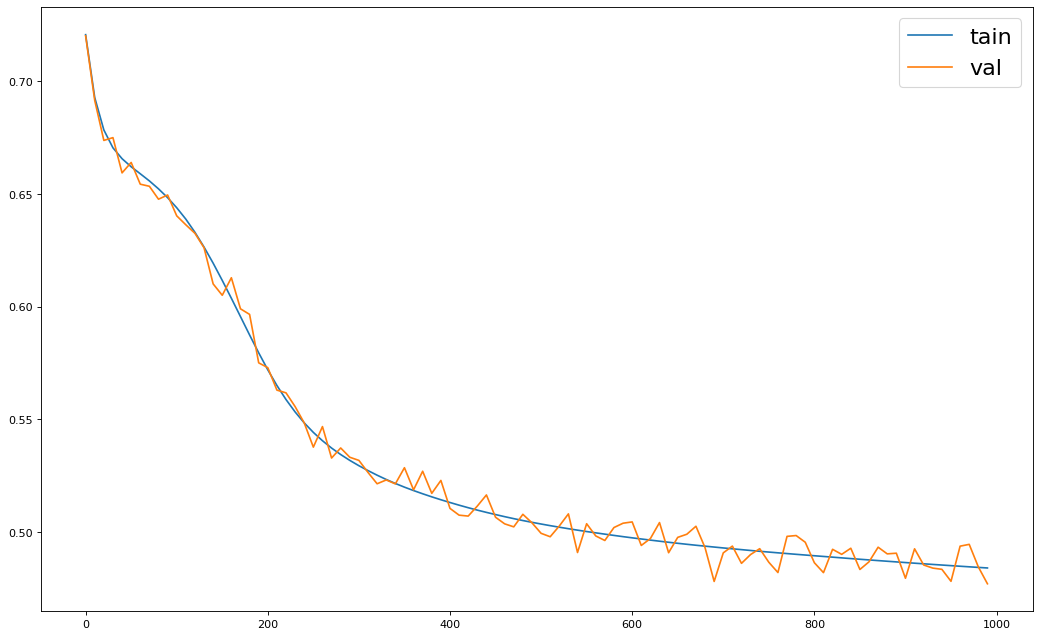

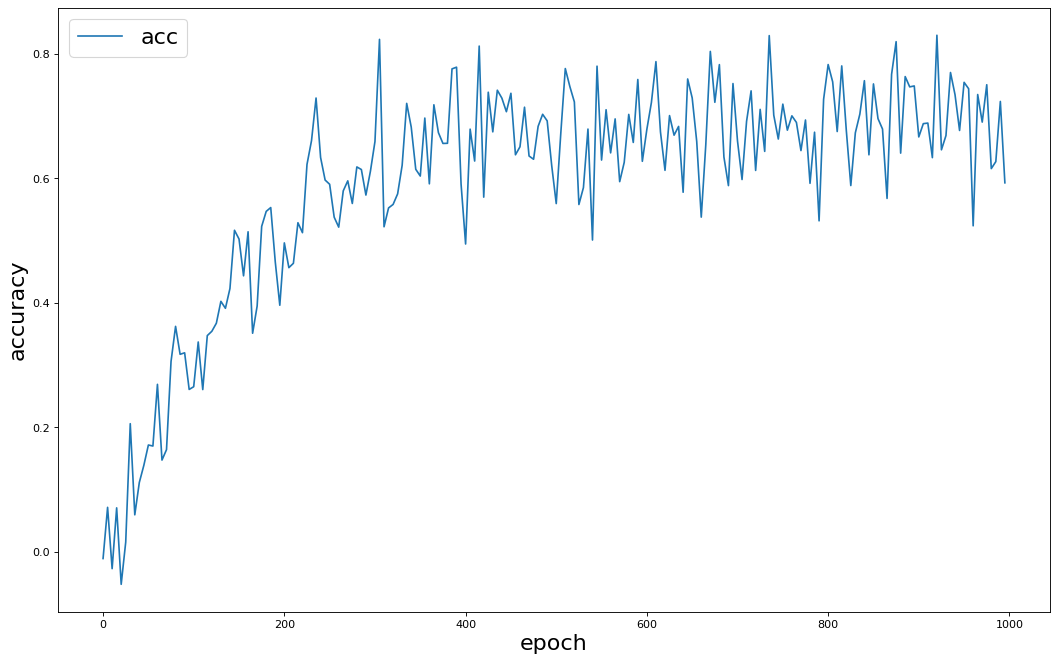

In [117]:
x_new = torch.tensor([np.concatenate((node_weight['LivingRoom'],node_weight['Bedroom']))])
np.random.shuffle(x_new)
y_pred = net(x_new)

# 打印预测结果
print("Predictions:", y_pred.detach().numpy())


Predictions: [[0.9056732]]


In [122]:
rooms=['LivingRoom', 'Bedroom', 'Kitchen', 'Dining', 'Bath', 'Storage', 'Entry', 'Garage',  'Outdoor']
list_1 =[]
list_2 = []
for i in range(len(rooms)):
    for j in range(i+1,len(rooms)):
        list_1.append(np.concatenate((node_weight[rooms[i]],node_weight[rooms[j]])))
        list_2.append([rooms[i],rooms[j]])
y_pred = net(torch.tensor(list_1))
print(y_pred)

tensor([[0.9057],
        [0.9044],
        [0.9368],
        [0.8871],
        [0.8235],
        [0.9244],
        [0.3202],
        [0.8791],
        [0.0563],
        [0.2335],
        [0.1249],
        [0.2912],
        [0.2217],
        [0.0847],
        [0.0472],
        [0.8764],
        [0.7742],
        [0.4922],
        [0.8669],
        [0.1054],
        [0.4990],
        [0.2567],
        [0.1802],
        [0.3539],
        [0.0600],
        [0.1242],
        [0.0875],
        [0.1897],
        [0.0300],
        [0.0207],
        [0.2413],
        [0.0851],
        [0.0598],
        [0.0934],
        [0.2835],
        [0.5456]], grad_fn=<SigmoidBackward0>)


In [127]:
mapping ={'Entry':'chamberoom'}
re_G = nx.Graph()
for i in range(len(y_pred)):
    if y_pred[i]>0.6:
        re_G.add_edge(list_2[i][0],list_2[i][1])

try:
    for node in re_G:
        re_G.nodes[node]['class']=node
    re_G = nx.relabel_nodes(re_G,mapping,copy=False)

except KeyError as e:
    print(e)


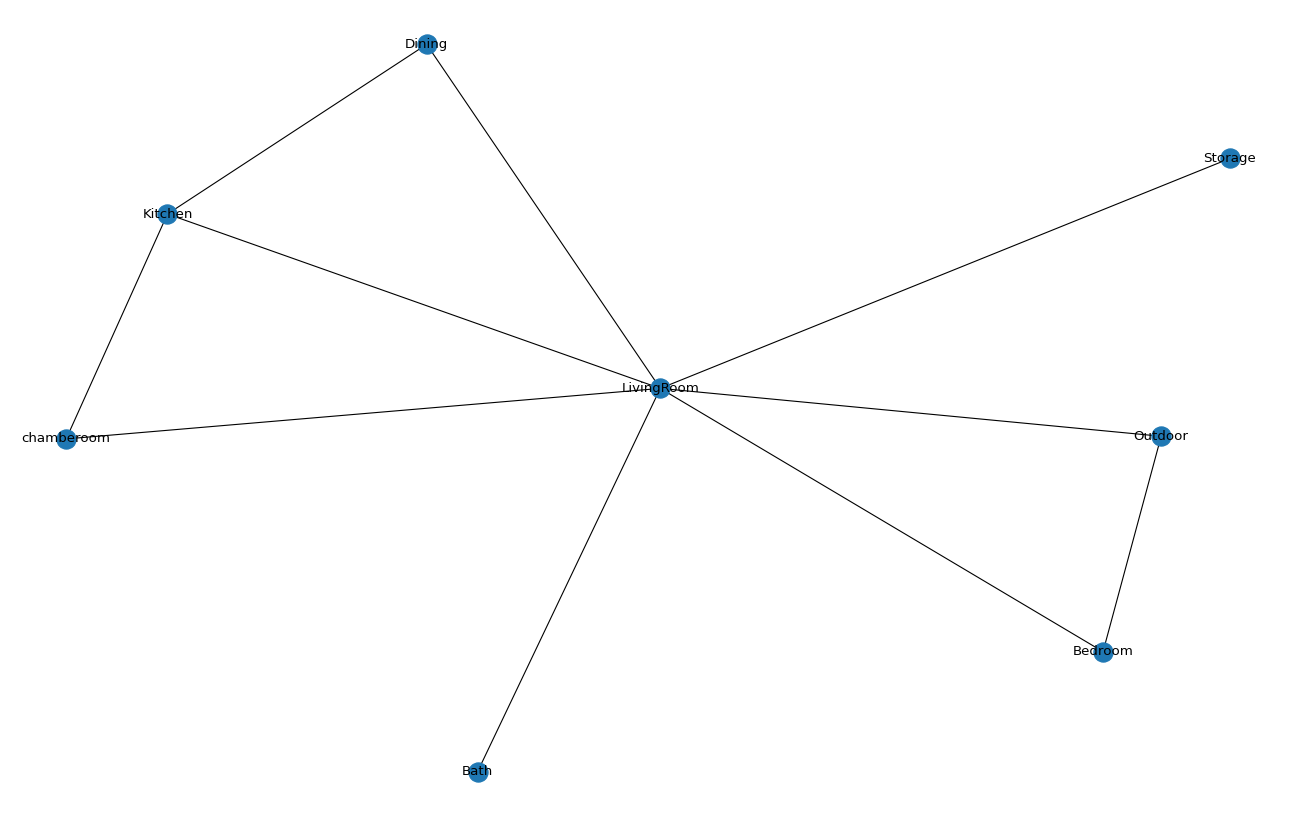

In [128]:
re_G.add_edge('Bedroom','Outdoor')
re_G.remove_edge('Bath','Kitchen')
plt.figure(figsize=(16,10), dpi= 80)
pos = nx.spring_layout(re_G)
nx.draw(re_G,pos = pos)
nx.draw_networkx_labels(re_G,pos = pos)
plt.show()

nx.write_gexf(re_G,"C:\\Users\\HanLi\\Desktop\\Arch_Research\\Generated_6.gexf")